<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #1 - Geyzson Kristoffer

https://uvle.upd.edu.ph/mod/assign/view.php?id=531880

<hr>

Table of Contents:
* [Importing Libraries](#import)
* [Initial Run of Linear Regression](#initial)
* [Rerun with top 5 features](#rerun)

Importing necessary libraries:
<span id="import"></span>


In [1519]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# reading the data
df = pd.read_excel('ENB2012_data.xlsx')

new_column_names = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

# Rename the DataFrame columns
df.rename(columns=new_column_names, inplace=True)
print(df.head())

# print nan values
print(f'\nTotal NaN values: {df.isna().sum().sum()}')

# print null values
print(f'\nTotal null values: {df.isnull().sum().sum()}')

# print data types
print(f'\nData types:\n{df.dtypes}')

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

First run of the code with all of the features
<span id="initial">

In [1520]:
# splitting the data into X and y
X = df.iloc[:, :8] # X1 to X8
y = df.iloc[:, 8] # heating load only

# splitting the data into train, validation, and test sets
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.4, random_state=69) # 60/40 split
X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5, random_state=69) # splitting further to get the 60/20/20 split

alphas = np.logspace(-1, 1, 10) # from 10**-1 to 10**1, 10 values
models = [] # list of models

# creating models with different alphas
for i, alpha in enumerate(alphas):
    models.append(make_pipeline(StandardScaler(), Ridge(alpha=alpha)).fit(X_train, y_train)) # making pipelines with standard scaler and ridge regression

# printing the accuracy and alpha of each model
for model in models:
    alpha = model.get_params()['ridge__alpha']
    accuracy_train = model.score(X_train, y_train)
    accuracy_val = model.score(X_val, y_val)
    print(f'Alpha: {alpha : .6f} | Training Accuracy: {accuracy_train : .6f} | Validation Accuracy: {accuracy_val : .6f}  ') 

# get the best model based on validation accuracy
best_model = models[np.argmax([model.score(X_val, y_val) for model in models])]
alpha = best_model.get_params()['ridge__alpha']
coef = best_model.get_params()['ridge'].coef_
intercept = best_model.get_params()['ridge'].intercept_

Alpha:  0.100000 | Training Accuracy:  0.909115 | Validation Accuracy:  0.922755  
Alpha:  0.166810 | Training Accuracy:  0.909110 | Validation Accuracy:  0.922726  
Alpha:  0.278256 | Training Accuracy:  0.909097 | Validation Accuracy:  0.922681  
Alpha:  0.464159 | Training Accuracy:  0.909067 | Validation Accuracy:  0.922613  
Alpha:  0.774264 | Training Accuracy:  0.909000 | Validation Accuracy:  0.922520  
Alpha:  1.291550 | Training Accuracy:  0.908865 | Validation Accuracy:  0.922411  
Alpha:  2.154435 | Training Accuracy:  0.908609 | Validation Accuracy:  0.922316  
Alpha:  3.593814 | Training Accuracy:  0.908128 | Validation Accuracy:  0.922263  
Alpha:  5.994843 | Training Accuracy:  0.907209 | Validation Accuracy:  0.922222  
Alpha:  10.000000 | Training Accuracy:  0.905468 | Validation Accuracy:  0.922028  


In [1521]:
# print the model with the highest accuracy among all models
print(f'Best Model:')
print(f'\talpha: {alpha : .6f}')
print(f'\ttraining accuracy: {best_model.score(X_train, y_train) : .5f}')
print(f'\tvalidation accuracy: {best_model.score(X_val, y_val) : .5f}')
print(f'\tcoefficients: {coef}')
print(f'\tintercept: {intercept}')

Best Model:
	alpha:  0.100000
	training accuracy:  0.90912
	validation accuracy:  0.92275
	coefficients: [-6.05743799 -3.03910856  0.80505193 -3.40185598  7.8326222  -0.1128605
  2.71987256  0.52375461]
	intercept: 22.539934782608697


### Final Evaluation in Test Data

In [1522]:
print(f'Best Model:')
print(f'\ttest accuracy: {best_model.score(X_test, y_test) : .5f}')

Best Model:
	test accuracy:  0.92564


### Question: What is the best model’s coefficients, intercept, and its training, validation, and test accuracy?

### Answer:

| Evaluation Metrics & Parameters                 | All Features Best Model |
|------------------------|---------------|
| Coefficients      | [-6.05743799, -3.03910856, 0.80505193, -3.40185598,  7.8326222,  -0.1128605,  2.71987256,  0.52375461]      |
| Intercept      | 22.53993      |
| Training-Accuracy      | 0.90912      |
| Validation-Accuracy    | 0.92275      |
| Testing-Accuracy       | 0.92564       |

<hr>

# Performing the same procedure but using the top features

In [1523]:
sorted_indices = np.argsort(np.abs(coef))[::-1] # sort in descending order

top5_coef = coef[sorted_indices[:5]] # top 5 coefficients
top5_feature_names = df.columns[:8][sorted_indices[:5]].tolist()

print("Top 5 Features:")
print("\t names:", ', '.join(top5_feature_names))
print("\t coefficients:", top5_coef)
print("\t indices:", sorted_indices[:5])

Top 5 Features:
	 names: Overall Height, Relative Compactness, Roof Area, Surface Area, Glazing Area
	 coefficients: [ 7.8326222  -6.05743799 -3.40185598 -3.03910856  2.71987256]
	 indices: [4 0 3 1 6]


## Repeating the same process but with the top 5 features <span id="rerun">

In [1524]:
# X will now be the top 5 features
X = df.iloc[:, [4, 0, 3, 1, 6]]
y = df.iloc[:, 8]

# splitting the data into train, validation, and test sets
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.4, random_state=69) # 60/40 split
X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5, random_state=69) # splitting further to get the 60/20/20 split

alphas = np.logspace(-1, 1, 10) # from 10**-1 to 10**1, 10 values
models = [] # list of models

# creating models with different alphas
for i, alpha in enumerate(alphas):
    models.append(make_pipeline(StandardScaler(), Ridge(alpha=alpha)).fit(X_train, y_train)) # making pipelines with standard scaler and ridge regression

# printing the accuracy and alpha of each model
for model in models:
    alpha = model.get_params()['ridge__alpha']
    accuracy_train = model.score(X_train, y_train)
    accuracy_val = model.score(X_val, y_val)
    print(f'Alpha: {alpha : .6f} | Training Accuracy: {accuracy_train : .6f} | Validation Accuracy: {accuracy_val : .6f}  ') 

# get the best model based on validation accuracy
best_model = models[np.argmax([model.score(X_val, y_val) for model in models])]
alpha = best_model.get_params()['ridge__alpha']
coef = best_model.get_params()['ridge'].coef_
intercept = best_model.get_params()['ridge'].intercept_

Alpha:  0.100000 | Training Accuracy:  0.906421 | Validation Accuracy:  0.926517  
Alpha:  0.166810 | Training Accuracy:  0.906417 | Validation Accuracy:  0.926491  
Alpha:  0.278256 | Training Accuracy:  0.906409 | Validation Accuracy:  0.926451  
Alpha:  0.464159 | Training Accuracy:  0.906389 | Validation Accuracy:  0.926396  
Alpha:  0.774264 | Training Accuracy:  0.906348 | Validation Accuracy:  0.926331  
Alpha:  1.291550 | Training Accuracy:  0.906269 | Validation Accuracy:  0.926277  
Alpha:  2.154435 | Training Accuracy:  0.906124 | Validation Accuracy:  0.926275  
Alpha:  3.593814 | Training Accuracy:  0.905857 | Validation Accuracy:  0.926372  
Alpha:  5.994843 | Training Accuracy:  0.905330 | Validation Accuracy:  0.926548  
Alpha:  10.000000 | Training Accuracy:  0.904202 | Validation Accuracy:  0.926578  


In [1525]:
# print the model with the highest accuracy among all models
print(f'Best Model:')
print(f'\talpha: {alpha : .6f}')
print(f'\ttraining accuracy: {best_model.score(X_train, y_train) : .5f}')
print(f'\tvalidation accuracy: {best_model.score(X_val, y_val) : .5f}')
print(f'\ttest accuracy: {best_model.score(X_test, y_test) : .5f}')
print(f'\tcoefficients: {coef}')
print(f'\tintercept: {intercept}')



Best Model:
	alpha:  10.000000
	training accuracy:  0.90420
	validation accuracy:  0.92658
	test accuracy:  0.92500
	coefficients: [ 7.71068437 -3.28294732 -4.67906309  0.91757006  2.76335503]
	intercept: 22.539934782608697


In [1526]:
# print the model with the same alpha as the best model but with the top 5 features
alpha = models[0].get_params()['ridge__alpha']
coef = models[0].get_params()['ridge'].coef_
intercept = models[0].get_params()['ridge'].intercept_

print(f'Same Alpha:')
print(f'\talpha: {alpha : .6f}')
print(f'\ttraining accuracy: {models[0].score(X_train, y_train) : .5f}')
print(f'\tvalidation accuracy: {models[0].score(X_val, y_val) : .5f}')
print(f'\tcoefficients: {coef}')
print(f'\tintercept: {intercept}')

Same Alpha:
	alpha:  0.100000
	training accuracy:  0.90642
	validation accuracy:  0.92652
	coefficients: [ 7.89264074 -5.97144026 -5.02829022 -1.25881311  2.83435557]
	intercept: 22.539934782608697


In [1527]:
print(f'Same Alpha:')
print(f'\ttest accuracy: {models[0].score(X_test, y_test) : .5f}')

Same Alpha:
	test accuracy:  0.92760


Q:  If you repeat the procedure above using only the 5 top features, what are the results?

A: Repeating with the same procedure but only using the 5 top features yields the following comparison:



| Evaluation Metrics & Parameters                 | All Features Best Model  | Top 5 Features but same alpha  | Best Model in 5 Features
|------------------------|---------------|-----------------|-----------------|
| Coefficients      | [-6.05743799, -3.03910856, 0.80505193, -3.40185598,  7.8326222,  -0.1128605,  2.71987256,  0.52375461]      | [ 7.89264074 -5.97144026 -5.02829022 -1.25881311  2.83435557] | [ 7.71068437 -3.28294732 -4.67906309  0.91757006  2.76335503] |
| Intercept      | 22.53993      | 22.53993 | 22.53993 |
| Alpha      | 0.100000      | 0.100000 |  10.000000
| Training Accuracy      | 0.90912      | 0.90642         | 0.90420
| Validation Accuracy    | 0.92275      | 0.92652         | 0.92658
| Testing Accuracy       | 0.92564       | 0.92760         | 0.92500



Q: Based on your results for this Problem, what insights did you gain?

A: Here are some insights
* The top 5 features in the initial run in terms of magnitude in descending order are Overall Height, Relative Compactness, Roof Area, Surface Area, Glazing Area
* The coefficients changed in the top 5 features as expected
* The intercepts are the same
* The Training accuracy worsened in both the Top 5 same alpha and in the Top 5 best model
* The Validation accuracy improved in both the Top 5 same alpha and in the Top 5 best model
* The Testing accuracy improved in the Top same alpha but worsened in the Top 5 best model
* It is better to include all the features if you have enough computing power
* Using the top features doesn't necessarily improve the testing accuracy
* 

<hr>

## Logistic Regression Problem


In [1528]:
# column names taken from the website
column_names = ['ID', 'Diagnosis',
                'radius1', 'texture1', 'perimeter1', 'area1',
                'smoothness1', 'compactness1', 'concavity1',
                'concave_points1', 'symmetry1', 'fractal_dimension1',
                'radius2', 'texture2', 'perimeter2', 'area2',
                'smoothness2', 'compactness2', 'concavity2',
                'concave_points2', 'symmetry2', 'fractal_dimension2',
                'radius3', 'texture3', 'perimeter3', 'area3',
                'smoothness3', 'compactness3', 'concavity3',
                'concave_points3', 'symmetry3', 'fractal_dimension3']

df = pd.read_csv('wdbc.data', header=None, names=column_names)
df

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1529]:
# print nan values
print(f'\nTotal NaN values: {df.isna().sum().sum()}')

# print null values
print(f'\nTotal null values: {df.isnull().sum().sum()}')

# print data types
print(f'\nData types:\n{df.dtypes}')


Total NaN values: 0

Total null values: 0

Data types:
ID                      int64
Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimens

In [1530]:
df = df.drop(columns=['ID']) # dropping ID column
df['Diagnosis'] = np.where(df['Diagnosis'] == 'M', 1, 0) # M = 1, B = 0
df


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


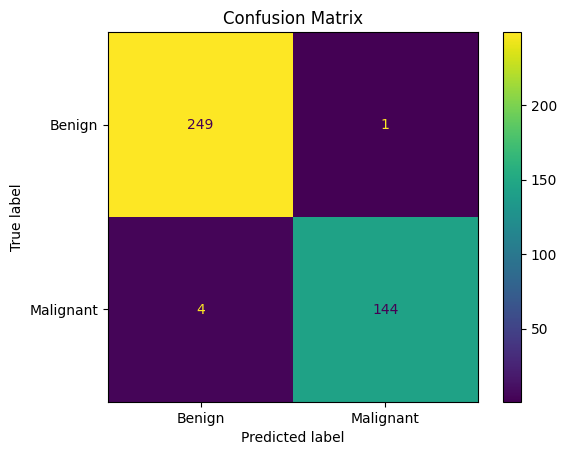

Train Accuracy:  0.987437
Test Accuracy:  0.982456


In [1531]:
X = df.iloc[:, 1:] # features
y = df.iloc[:, :1].values.ravel() # diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, stratify=y) # 70/30 split

model = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train) # model

train_accuracy = model.score(X_train, y_train) # accuracy
test_accuracy = model.score(X_test, y_test) # accuracy

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ypred = model.predict(X_train)
cfm = confusion_matrix(y_train, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

print(f'Train Accuracy: {train_accuracy : .6f}')
print(f'Test Accuracy: {test_accuracy : .6f}')


In [1538]:
logistic_model = model.named_steps['logisticregression']
coefficients = logistic_model.coef_.flatten()
feature_importance = np.abs(coefficients)
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importance)[::-1]

# Display the most important features
print("Most Important Features:")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importance[index]}")

Most Important Features:
texture3: 1.222972571493532
radius2: 1.089661584149351
concavity3: 1.040511217924693
concavity1: 1.0264045467755127
area2: 1.0038332334945217
compactness2: 0.9912451154982466
symmetry3: 0.9145479311794302
area3: 0.8804733987472783
radius3: 0.8566418258836906
concave_points1: 0.8429165391490908
concave_points3: 0.80082752535693
perimeter3: 0.6837750814810297
smoothness3: 0.5774369217008158
fractal_dimension2: 0.5285164877077012
texture1: 0.4848772503629325
compactness1: 0.4427197287117998
perimeter2: 0.41541755576733763
symmetry2: 0.396754465399976
area1: 0.36898833374088835
concave_points2: 0.35138944760178414
smoothness2: 0.3273553651138955
perimeter1: 0.2997789587654553
radius1: 0.29569402152471885
texture2: 0.23883085808588608
compactness3: 0.19357884093424038
concavity2: 0.1893042277435788
fractal_dimension1: 0.11575665961889962
fractal_dimension3: 0.0897690341932892
smoothness1: 0.024594101267094704
symmetry1: 0.010089626396966847


In [1533]:
# Calculate the False Positive Rate (FPR)
true_negatives, false_positives = cfm[0]
false_negatives, true_positives = cfm[1]

recall = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
f1_score = 2 * (recall * precision) / (recall + precision)
false_alarm_rate = false_positives / (false_positives + true_negatives)

print(f'Recall: {recall : .6f}') 
print(f'Precision: {precision : .6f}')
print(f'F1 Score: {f1_score : .6f}')
print(f'False Alarm Rate: {false_alarm_rate : .6f}')

Recall:  0.972973
Precision:  0.993103
False Alarm Rate:  0.004000
F1 Score:  0.982935


In [1534]:
# Extracting the logistic regression model from the pipeline
logistic_reg_model = model.named_steps['logisticregression']

# Checking the order of classes
class_order = logistic_reg_model.classes_

print("Class order in the model:", class_order)


Class order in the model: [0 1]


In [1535]:
# Extracting the logistic regression model from the pipeline
logistic_reg_model = model.named_steps['logisticregression']

# Extracting the coefficients
coefficients = logistic_reg_model.coef_[0]

# Taking the absolute value of coefficients for ranking
abs_coefficients = np.abs(coefficients)

# Get the sorted feature indices based on absolute coefficients
sorted_indices = np.argsort(abs_coefficients)[::-1]

# Getting the names of the top features
top_feature_names = X.columns[sorted_indices]

print("Top feature indices based on absolute coefficients:", sorted_indices)
print("Top feature names:", top_feature_names)
print("Sorted Coefficients:", coefficients[sorted_indices])

# If you want to focus on the top N features, you can slice the array
N = 5  # For example, top 5 features
print("Top", N, "features are:")
print(top_feature_names[:N])


Top feature indices based on absolute coefficients: [21 10 26  6 13 15 28 23 20  7 27 22 24 19  1  5 12 18  3 17 14  2  0 11
 25 16  9 29  4  8]
Top feature names: Index(['texture3', 'radius2', 'concavity3', 'concavity1', 'area2',
       'compactness2', 'symmetry3', 'area3', 'radius3', 'concave_points1',
       'concave_points3', 'perimeter3', 'smoothness3', 'fractal_dimension2',
       'texture1', 'compactness1', 'perimeter2', 'symmetry2', 'area1',
       'concave_points2', 'smoothness2', 'perimeter1', 'radius1', 'texture2',
       'compactness3', 'concavity2', 'fractal_dimension1',
       'fractal_dimension3', 'smoothness1', 'symmetry1'],
      dtype='object')
Sorted Coefficients: [ 1.22297257  1.08966158  1.04051122  1.02640455  1.00383323 -0.99124512
  0.91454793  0.8804734   0.85664183  0.84291654  0.80082753  0.68377508
  0.57743692 -0.52851649  0.48487725 -0.44271973  0.41541756 -0.39675447
  0.36898833  0.35138945  0.32735537  0.29977896  0.29569402 -0.23883086
 -0.19357884 -0.

AUC:  0.9973442207071508


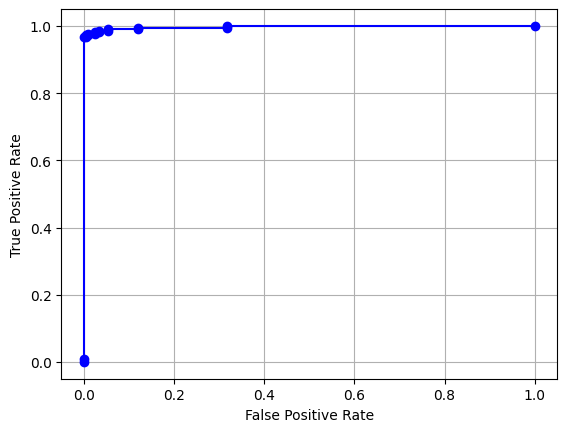

In [1536]:
from sklearn import metrics

y2 = model.predict_proba(X)
fpr, tpr, thresholds = metrics.roc_curve(y, y2[:,1])
print(f"AUC: ",metrics.roc_auc_score(y, y2[:,1]))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

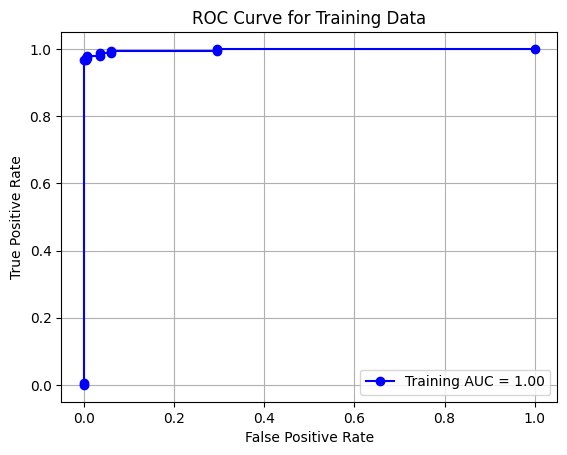

Training AUC: 0.9972702702702703


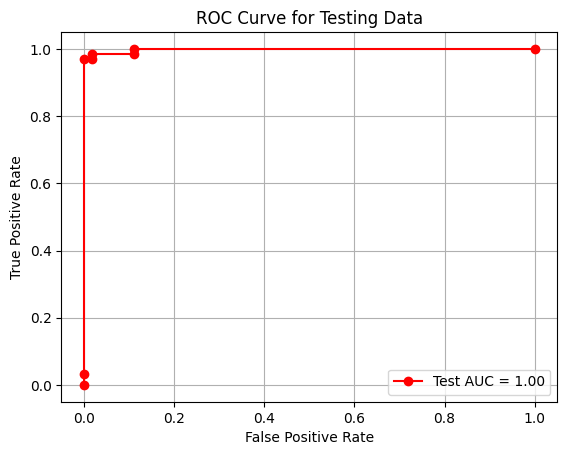

Test AUC: 0.9979556074766355


In [1537]:
from sklearn import metrics
import matplotlib.pyplot as plt

# For Training Data
y_train_prob = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_prob)
auc_train = metrics.roc_auc_score(y_train, y_train_prob)
plt.figure()
plt.plot(fpr_train, tpr_train, 'b-o', label=f'Training AUC = {auc_train:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend()
plt.grid()
plt.show()
print(f"Training AUC: {auc_train}")

# For Testing Data
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_prob)
auc_test = metrics.roc_auc_score(y_test, y_test_prob)
plt.figure()
plt.plot(fpr_test, tpr_test, 'r-o', label=f'Test AUC = {auc_test:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend()
plt.grid()
plt.show()
print(f"Test AUC: {auc_test}")
